In [13]:
#how to work with dictionaries
import pandas as pd
dic={'C1': {'R1': 1, 'R2': 4, 'R3': 7}, 'C2': {'R1': 2, 'R2': 5, 'R3': 8}, 'C3': {'R1': 3, 'R2': 6, 'R3': 9}}
print(dic)
df=pd.DataFrame.from_dict(dic)
print(df)

{'C1': {'R1': 1, 'R2': 4, 'R3': 7}, 'C2': {'R1': 2, 'R2': 5, 'R3': 8}, 'C3': {'R1': 3, 'R2': 6, 'R3': 9}}
    C1  C2  C3
R1   1   2   3
R2   4   5   6
R3   7   8   9


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
from cmdstanpy import CmdStanModel
import statistics

In [15]:
model = CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:compiling stan file E:\AGH\2022-1\2_Data_Analytics\lab1\bern_1.stan to exe file E:\AGH\2022-1\2_Data_Analytics\lab1\bern_1.exe
INFO:cmdstanpy:compiled model executable: E:\AGH\2022-1\2_Data_Analytics\lab1\bern_1.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=E:/AGH/2022-1/2_Data_Analytics/lab1/bern_1.hpp E:/AGH/2022-1/2_Data_Analytics/lab1/bern_1.stan
Warning in 'E:/AGH/2022-1/2_Data_Analytics/lab1/bern_1.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I s

In [25]:
model

CmdStanModel: name=bern_1
	 stan_file=E:\AGH\2022-1\2_Data_Analytics\lab1\bern_1.stan
	 exe_file=E:\AGH\2022-1\2_Data_Analytics\lab1\bern_1.exe
	 compiler_options=stanc_options={}, cpp_options={}

In [16]:
#jhon velasquez
#F=4
#L=9
F=len("jhon") #4
L=len("velasquez") #9
N=F+L
y=list(itertools.repeat(0, F))+list(itertools.repeat(1, L))
dic = {"N":N,"y":y}

In [17]:
dic

{'N': 13, 'y': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [18]:
sample=model.sample(dic)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [19]:
sample.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-10.00,0.0190,0.76,-12.00,-9.80,-9.50,1600.0,3800.0,1.0
theta,0.66,0.0031,0.12,0.45,0.67,0.85,1400.0,3400.0,1.0


In [20]:
draws_theta = sample.stan_variable('theta')

In [21]:
draws_theta

array([0.851575, 0.880609, 0.740942, ..., 0.716977, 0.764172, 0.746285])

In [22]:
len(draws_theta)

4000

In [23]:
quant_5, quant_50, quant_95 = np.quantile(draws_theta,0.05), np.quantile(draws_theta,0.5), np.quantile(draws_theta,0.95)
mean=statistics.mean(draws_theta)

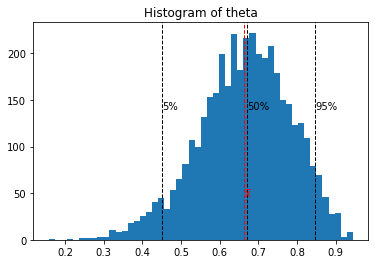

In [24]:
plt.figure
plt.hist(draws_theta, bins=50)
plt.title("Histogram of theta")
min_ylim, max_ylim = plt.ylim()
plt.axvline(quant_5, color='k', linestyle='dashed', linewidth=1),plt.text(quant_5,max_ylim*0.6, '5%')
plt.axvline(quant_50, color='k', linestyle='dashed', linewidth=1),plt.text(quant_50,max_ylim*0.6, '50%')
plt.axvline(quant_95, color='k', linestyle='dashed', linewidth=1),plt.text(quant_95,max_ylim*0.6, '95%')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1),plt.text(mean,max_ylim*0.2, 'x̅', color='r')
plt.show()